<a href="https://colab.research.google.com/github/Abdullah12389/Multimart/blob/main/vernelable_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests as re
import numpy as np
import pandas as pd
from tqdm import tqdm

In [ ]:
data=pd.DataFrame()
for chunk in tqdm(pd.read_csv("/content/myntra202305041052.csv",chunksize=1000,on_bad_lines='skip',nrows=20000)):
  data=pd.concat([data,chunk])

20it [00:00, 41.48it/s]


In [ ]:
data=data.sample(2000)
data=data.loc[:,'name':"img"]

In [ ]:
data=data.reset_index(drop=True)

In [ ]:
words=np.array([])
for word in data["name"]:
  word=word.split()
  words=np.append(words,word[-1])

In [ ]:
dat=pd.concat([data.drop(columns=["name"]),pd.DataFrame(words,columns=["label"])],axis=1)

In [ ]:
for i,word in enumerate(dat["label"]):
  if word.isdigit():
    dat.drop(index=i,inplace=True)

In [ ]:
condition=dat["label"].value_counts()>30
dat["label"].value_counts()[condition]

,count
label,
T-shirt,139
Set,105
Jeans,63
Watch,61
Backpack,59
Dress,56
ml,48
suit,40
Saree,39


In [ ]:
for i in data['name']:
  if i.split()[-1]=="ml":
    print(i)

Strobe Dewy Skin Tint 30 ml
Cream Skin Refiner 150 ml
Stretch Mark Oil 200 ml
Bronze Body Perfume 120 ml
Men Oud Extreme EDP - 100 ml
Tranquil Body Wash 470 ml
Green Tea Daylight Sustainable Sunscreen Gel 50 ml
SPF 15 Body Lotion 200 ml
Baby Daily Lotion - 400 ml
Makeup Setting Spray - 60 ml
Aloe Vera Gel 300 ml
Unisex Sustainable Face Lotion 50 ml
Men Dream Big EDT 100 ml
Revitalift Night Cream 50 ml
Handy 850 Water Bottle 780 ml
Sustain Pure Rose Water 200 ml
Men Intimately 150 ml
Retinol Night Cream - 60 ml
Men Deep Impact Roll-On 50 ml
Men Silver Scent EDT 100 ml
Nayaab Eau De Parfum - 100 ml
Men Xpressio EDP 100 ml
Women Eau de Toilette 30 ml
Eladi Hydrating Cream 30 ml
Men Raw Eau de Parfum 20 ml
Men Classic Perfume - 100 ml
Women Pure Musc EDP 50 ml
Water Bottle 750 ml
Women Eau de Parfum 100 ml
Gentle Skin Cleanser - 125 ml
Unisex Sustainable Face Lotion 50 ml
Micellar Water 400 ml
Shower Wash 200 ml
Women Sheer EDP 20 ml
Men Classic Blue EDT 90 ml
Good Girl Eau de Parfum 50 ml

#I am first downloading images for vernelable product detection

In [ ]:
import os
j=0
folder="images"
for i in data['img'][0:500]:
  response=re.get(i)
  if response.status_code==200:
    file=f"image{j}.jpg"
    with open(f"{folder}/{file}","wb") as f:
      f.write(response.content)
    j+=1
    print("Success")
  else:
     print("fail")

Success
fail
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Suc

In [ ]:
file=os.path.join(folder,"img1.jpg")

In [ ]:
path=data['img'][1]

In [ ]:
response=re.get(path)
with open("images/img1.jpg","wb") as f:
  f.write(response.content)

#Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,GlobalAveragePooling2D

In [ ]:
train_ds=image_dataset_from_directory(
    directory="/content/drive/MyDrive/data/train",
    labels="inferred",
    label_mode="int",
    batch_size=16,
    image_size=(256,256),
    shuffle=True
)

Found 978 files belonging to 2 classes.


In [ ]:
val_ds=image_dataset_from_directory(
    directory="/content/drive/MyDrive/data/test",
    labels="inferred",
    label_mode="int",
    batch_size=16,
    image_size=(256,256),
    shuffle=True
)

Found 118 files belonging to 2 classes.


In [ ]:
def preprocess(img):
  img=img/255.0
  return img
train_ds=train_ds.map(lambda x,y:(preprocess(x),y))
val_ds=val_ds.map(lambda x,y:(preprocess(x),y))

In [ ]:
from tensorflow.keras.applications import EfficientNetV2B3
model=EfficientNetV2B3(include_top=False,
                       weights="imagenet",
                       input_shape=(256,256,3),
                       classes=2,
                       include_preprocessing=False
)

52606240/52606240 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
for i in model.layers:
  i.trainable=False

In [ ]:
x=GlobalAveragePooling2D()(model.output)
x=Dense(512,activation="relu")(x)
x=Dropout(0.2)(x)
x=Dense(256,activation="relu")(x)
x=Dropout(0.2)(x)
x=Dense(1,activation="sigmoid")(x)
new_model=tf.keras.models.Model(inputs=model.input,outputs=x)

In [ ]:
new_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history=new_model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 617s 9s/step - accuracy: 0.8978 - loss: 0.2139 - val_accuracy: 0.9831 - val_loss: 0.0734
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - accuracy: 0.9914 - loss: 0.0169 - val_accuracy: 0.9915 - val_loss: 0.0482
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.9774 - loss: 0.0607 - val_accuracy: 0.9915 - val_loss: 0.0468
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.9821 - loss: 0.0552 - val_accuracy: 0.9915 - val_loss: 0.0635
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9915 - val_loss: 0.0715
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 175ms/step - accuracy: 0.9992 - loss: 0.0044 - val_accuracy: 0.9746 - val_loss: 0.1265
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step - accuracy: 0.9954 - loss: 0.0057 - val_accuracy: 0.9915 - val_loss: 0.0827
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 266ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accura

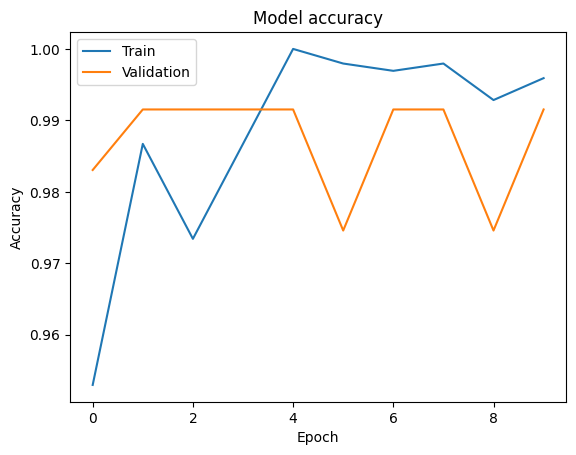

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
import pickle
pickle.dump(new_model,open("vernelable_detect.pkl","wb"))

In [ ]:
pred=new_model.predict(val_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


In [ ]:
image_path="https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.bloomberg.com%2Fnews%2Farticles%2F2023-08-09%2Fthe-legal-fight-over-ghost-guns-explained&psig=AOvVaw26_tsD-NtSVi70ZfxxMQ2i&ust=1737741260770000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCIisv-m0jIsDFQAAAAAdAAAAABAJ"
img=tf.keras.preprocessing.image.load_img(image_path,target_size=(256,256))

FileNotFoundError: [Errno 2] No such file or directory: 'https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.bloomberg.com%2Fnews%2Farticles%2F2023-08-09%2Fthe-legal-fight-over-ghost-guns-explained&psig=AOvVaw26_tsD-NtSVi70ZfxxMQ2i&ust=1737741260770000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCIisv-m0jIsDFQAAAAAdAAAAABAJ'

In [ ]:
img_array=tf.keras.preprocessing.image.img_to_array(img)

In [ ]:
img=img_array/255

In [ ]:
img.shape

(256, 256, 3)

In [ ]:
new_model.predict(img.reshape(1,256,256,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[1.0670433e-06]], dtype=float32)

In [ ]:
!python --version

Python 3.11.11


In [ ]:
import tensorflow
import keras
import numpy
print("tensorflow==",tensorflow.__version__)
print("keras==",keras.__version__)
print("numpy==",numpy.__version__)

tensorflow== 2.17.1
keras== 3.5.0
numpy== 1.26.4
